<p align="center">
<b><font size="9" color="#000080">PORTICO PLANO ETABS</font></b>
<div align="center">
    <div style="display: inline-block;">
    <span style="font-size: 18px;position: relative; bottom: 13px;">Richard Cueto Calderon | Update :7/05/204 | API ETBAS | Python</span>
    </div>
</div>
</p>

In [24]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt

ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)

In [25]:

b_c,h_c=0.45,0.45
b_v,h_v=0.3,0.6
E=15000*280**0.5
# Ac,Av=b_c*h_c,b_v*h_v
# Ic,Iv=b_c*h_c**3/12,b_v*h_v**3/12
Ic=Iv=1
Ac=Av=10000

In [26]:
ops.node(1,0,0)
ops.node(2,0, 10)
ops.node(3,5, 10)
ops.node(4,5,0)

ops.fix(1,1,1,1)
ops.fix(4,1,1,1)

ops.geomTransf('Linear', 1)

ops.element('elasticBeamColumn',1,1,2,Ac,E,Ic,1)
ops.element('elasticBeamColumn',2,2,3,Ac,E,Ic,1)
ops.element('elasticBeamColumn',3,3,4,Ac,E,Ic,1)
# ops.element('elasticBeamColumn',4,4,5,Av,E,Iv,1)
# ops.element('elasticBeamColumn',5,5,6,Av,E,Iv,1)

Px = 20
Wy = -16
Wx = 0.

Ew = {2: ['-beamUniform', Wy, Wx],
      }

In [27]:
ops.timeSeries('Constant', 1)
ops.pattern('Plain', 1, 1)

for etag in Ew:
    ops.eleLoad('-ele', etag, '-type', Ew[etag][0], Ew[etag][1],
                Ew[etag][2])

ops.load(2,Px,0,0)

In [ ]:
opsv.plot_model()
plt.title('plot_model after defining elements')

In [28]:

ops.constraints('Transformation')
ops.numberer('RCM')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1.0e-6, 6, 2)
ops.algorithm('Linear')
ops.integrator('LoadControl', 1)
ops.analysis('Static')
ops.analyze(1)

0

In [ ]:
opsv.plot_loads_2d()
plt.title('plot_model loads')

In [29]:
sfacN, sfacV, sfacM = 5.e-5, 5.e-5, 5.e-5

In [ ]:
opsv.plot_defo()
plt.title('plot_model deformation')

In [ ]:
opsv.section_force_diagram_2d('N', sfacN)
plt.title('Axial force distribution')

In [ ]:
opsv.section_force_diagram_2d('T', sfacV)
plt.title('Shear force distribution')

Text(0.5, 1.0, 'Bending moment distribution')

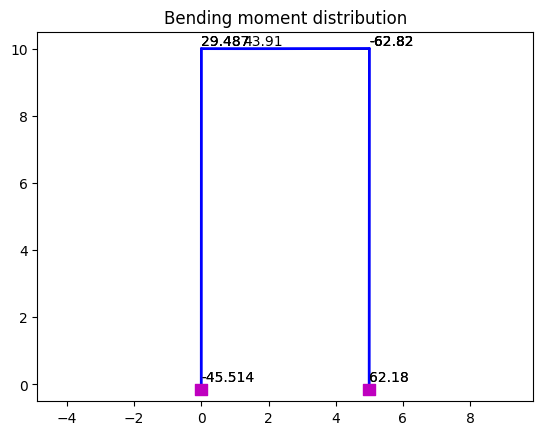

In [30]:
opsv.section_force_diagram_2d('M', sfacM)
plt.title('Bending moment distribution')

In [ ]:
# plt.show()
exit()